In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def plot_metrics(metrics_df):
    # Recompute metrics based on the clarified definitions
    metrics_df['itl'] = (metrics_df['last_token_time'] - metrics_df['first_scheduled_time']) / metrics_df['output_num_tokens']
    metrics_df['ttft'] = metrics_df['first_scheduled_time'] - metrics_df['arrival_time']
    metrics_df['total_latency'] = metrics_df['finished_time'] - metrics_df['arrival_time']

    # Group by LoRA policy, LoRA ID, and num_iters_before_lora_reschedule
    revised_grouped = metrics_df.groupby(
        ['lora_policy', 'lora_id', 'num_iters_before_lora_reschedule']
    ).agg({
        'total_latency': ['mean', 'std'],
        'itl': ['mean', 'std'],
        'ttft': ['mean', 'std']
    }).reset_index()

    # Simplify column names
    revised_grouped.columns = [
        'lora_policy', 'lora_id', 'num_iters_before_lora_reschedule',
        'latency_mean', 'latency_std',
        'itl_mean', 'itl_std',
        'ttft_mean', 'ttft_std'
    ]

    # Plot comparisons for each num_iters_before_lora_reschedule
    unique_iters = revised_grouped['num_iters_before_lora_reschedule'].unique()
    fig, axs = plt.subplots(len(unique_iters), 3, figsize=(15, 5 * len(unique_iters)))

    for idx, num_iters in enumerate(sorted(unique_iters)):
        # Filter data for the current num_iters_before_lora_reschedule
        subset = revised_grouped[revised_grouped['num_iters_before_lora_reschedule'] == num_iters]
        naive_data = subset[subset['lora_policy'] == 'LoraPolicy.NAIVE']
        rr_data = subset[subset['lora_policy'] == 'LoraPolicy.ROUND_ROBIN']

        # Total Latency
        axs[idx, 0].bar(naive_data['lora_id'], naive_data['latency_mean'], label='NAIVE', alpha=0.7)
        axs[idx, 0].bar(rr_data['lora_id'], rr_data['latency_mean'], label='ROUND_ROBIN', alpha=0.7)
        axs[idx, 0].set_title(f"Total Latency (num_iters={num_iters})")
        axs[idx, 0].set_xlabel("LoRA ID")
        axs[idx, 0].set_ylabel("Latency (s)")
        axs[idx, 0].legend()

        # ITL (Inter-Token Latency)
        axs[idx, 1].bar(naive_data['lora_id'], naive_data['itl_mean'], label='NAIVE', alpha=0.7)
        axs[idx, 1].bar(rr_data['lora_id'], rr_data['itl_mean'], label='ROUND_ROBIN', alpha=0.7)
        axs[idx, 1].set_title(f"ITL (Inter-Token Latency, num_iters={num_iters})")
        axs[idx, 1].set_xlabel("LoRA ID")
        axs[idx, 1].set_ylabel("ITL (s/token)")
        axs[idx, 1].legend()

        # TTFT (Time to First Token)
        axs[idx, 2].bar(naive_data['lora_id'], naive_data['ttft_mean'], label='NAIVE', alpha=0.7)
        axs[idx, 2].bar(rr_data['lora_id'], rr_data['ttft_mean'], label='ROUND_ROBIN', alpha=0.7)
        axs[idx, 2].set_title(f"TTFT (Time to First Token, num_iters={num_iters})")
        axs[idx, 2].set_xlabel("LoRA ID")
        axs[idx, 2].set_ylabel("TTFT (s)")
        axs[idx, 2].legend()

    plt.tight_layout()
    plt.show()

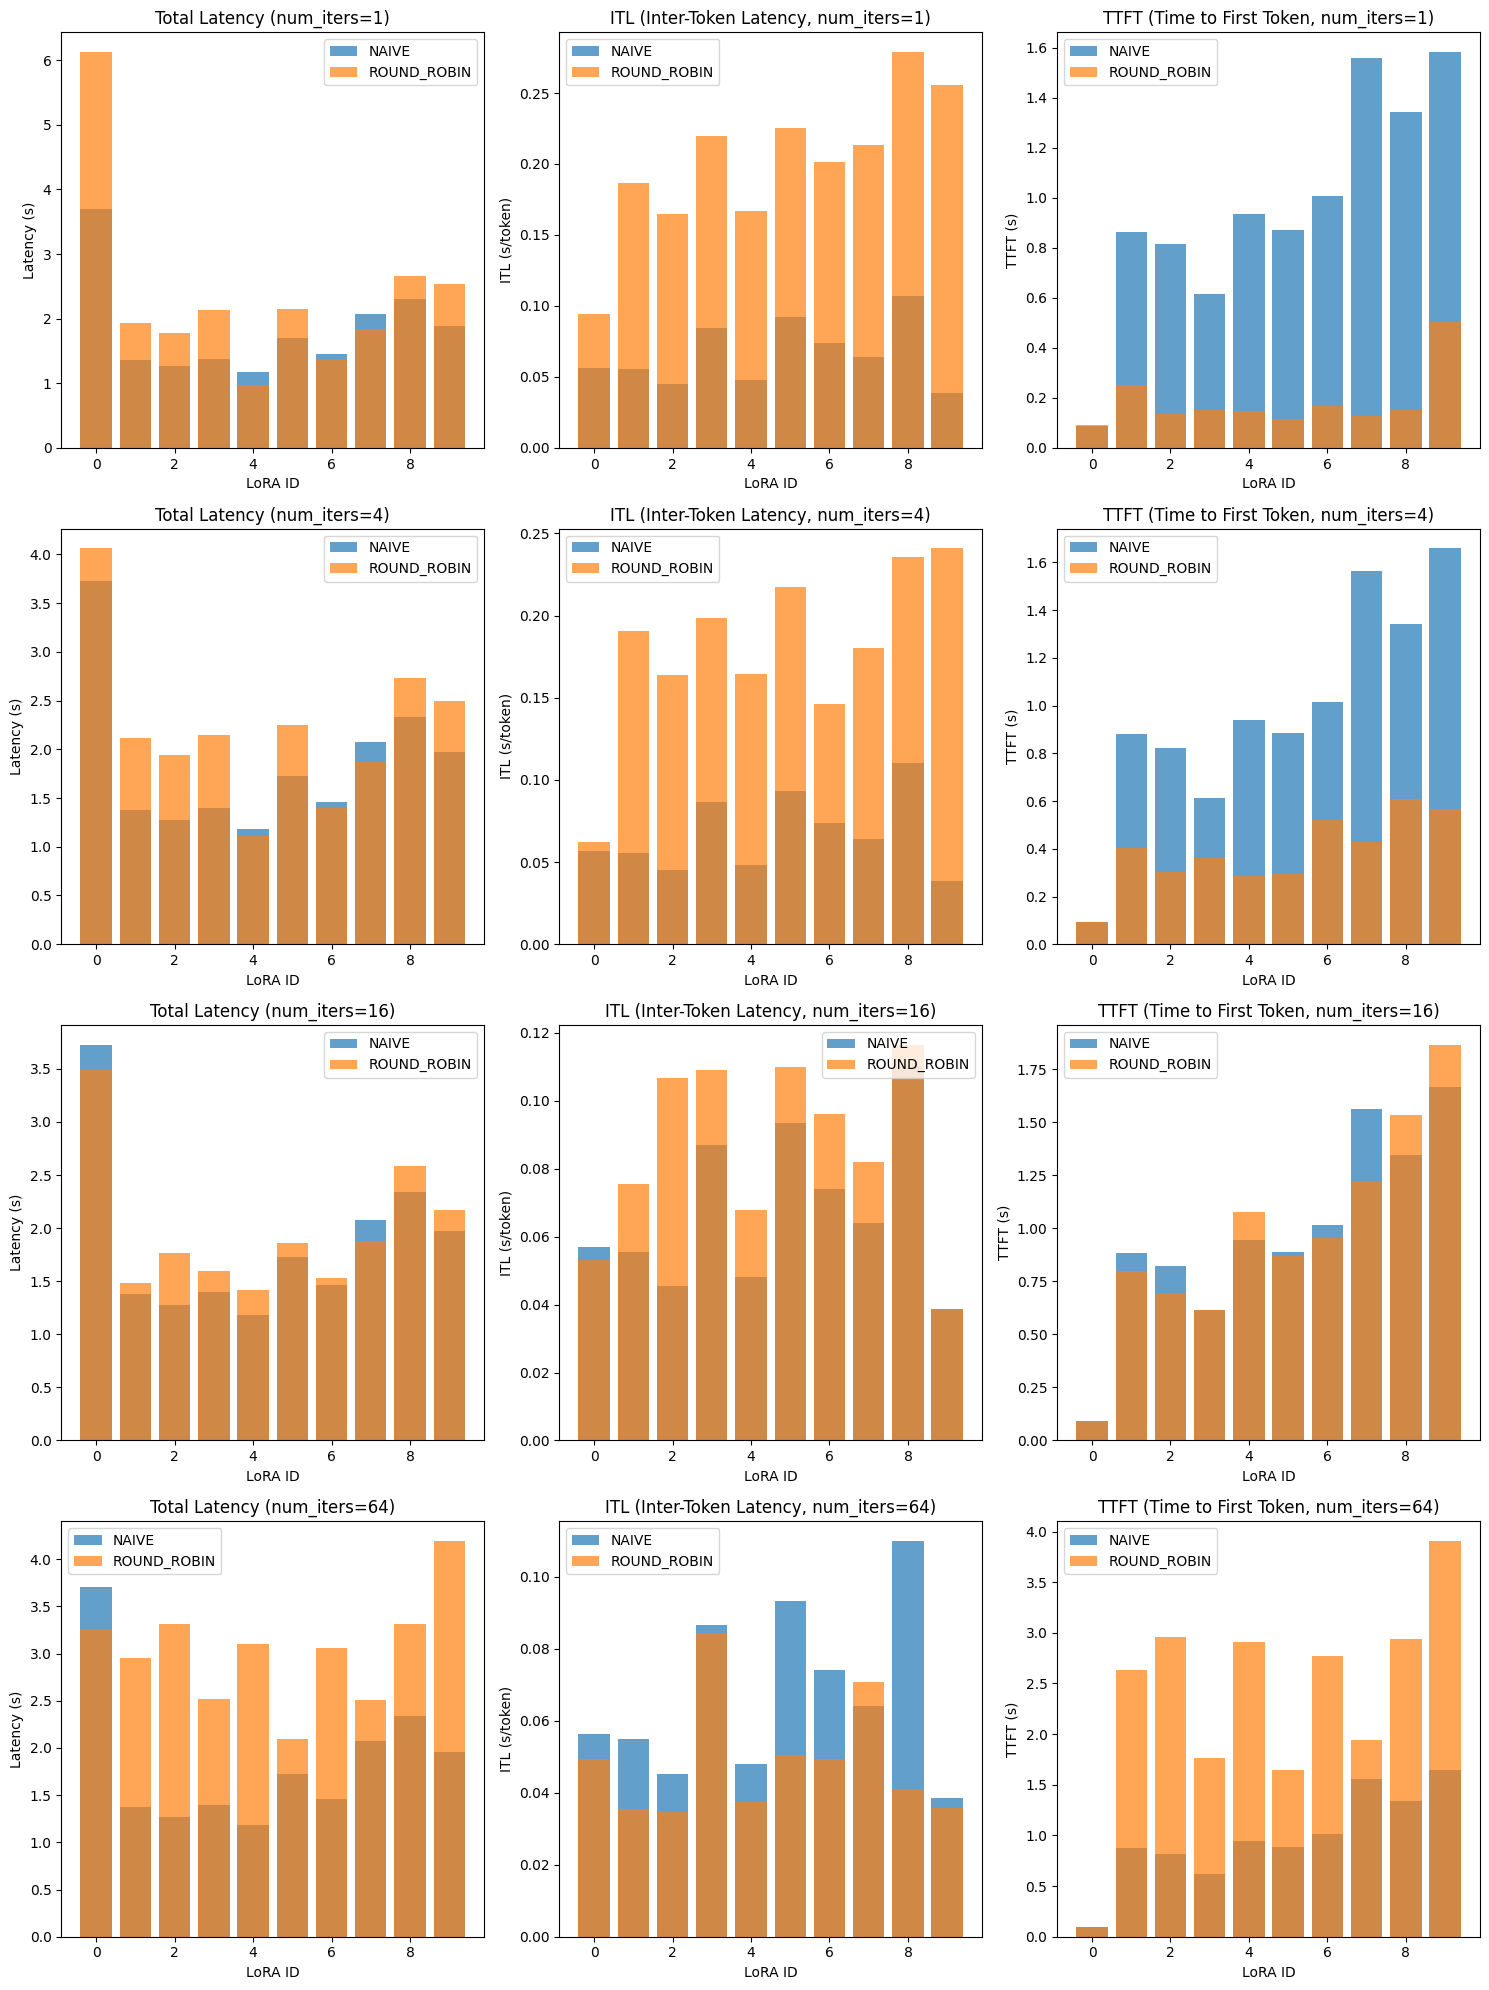

In [13]:
metrics_df = pd.read_csv("../out/metrics_long.csv")
plot_metrics(metrics_df)

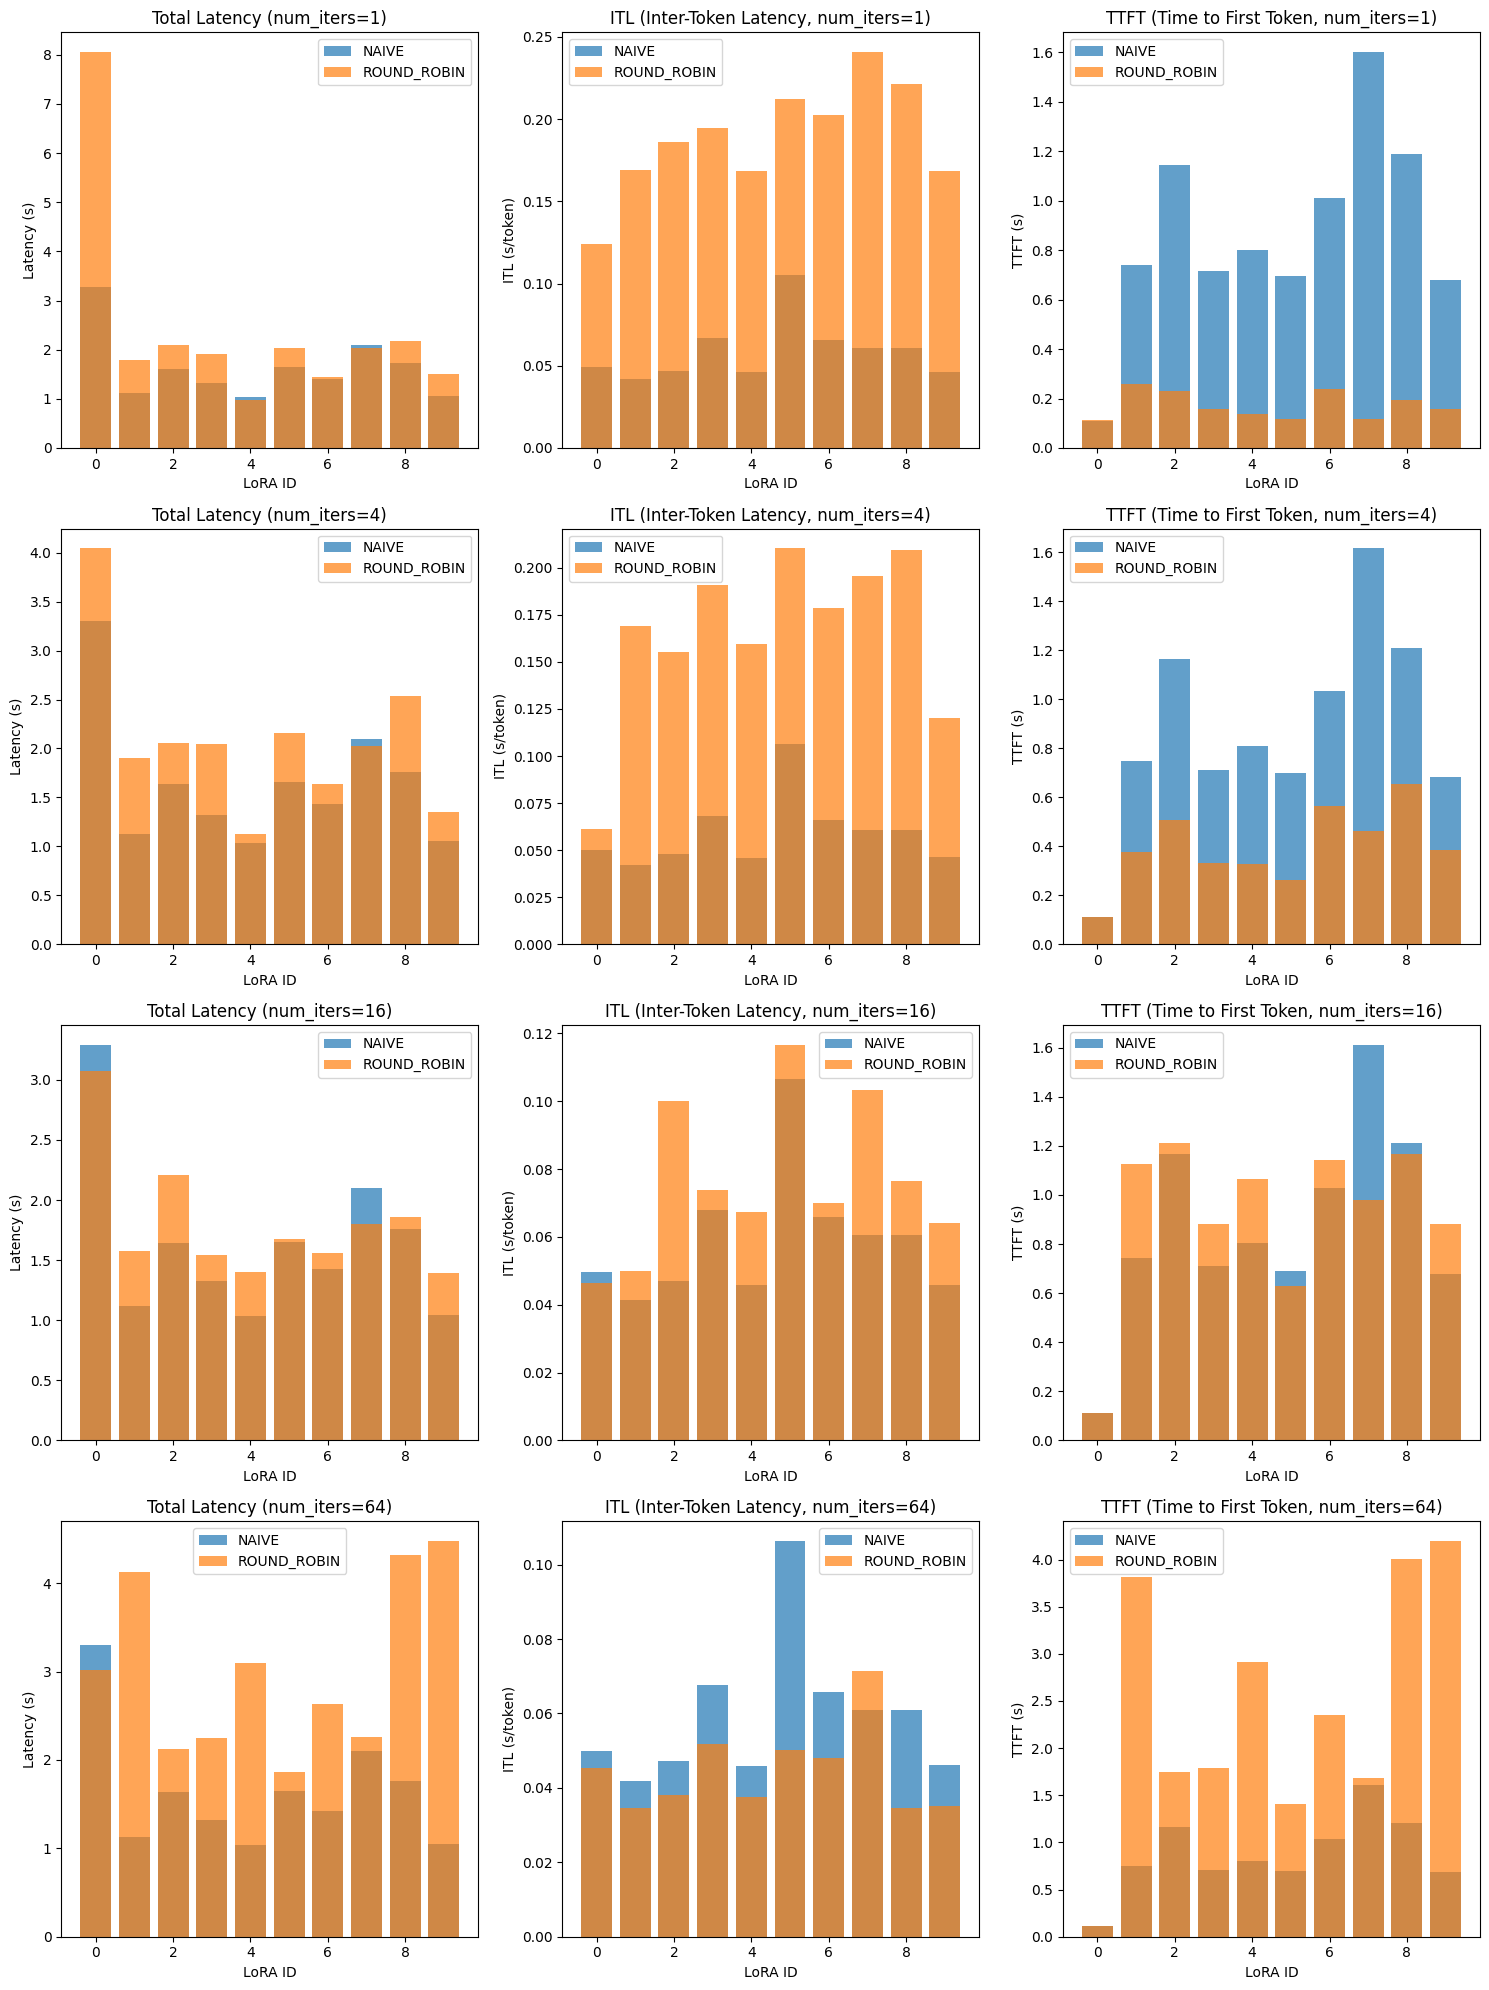

In [14]:
metrics_df = pd.read_csv("../out/metrics_short.csv")
plot_metrics(metrics_df)

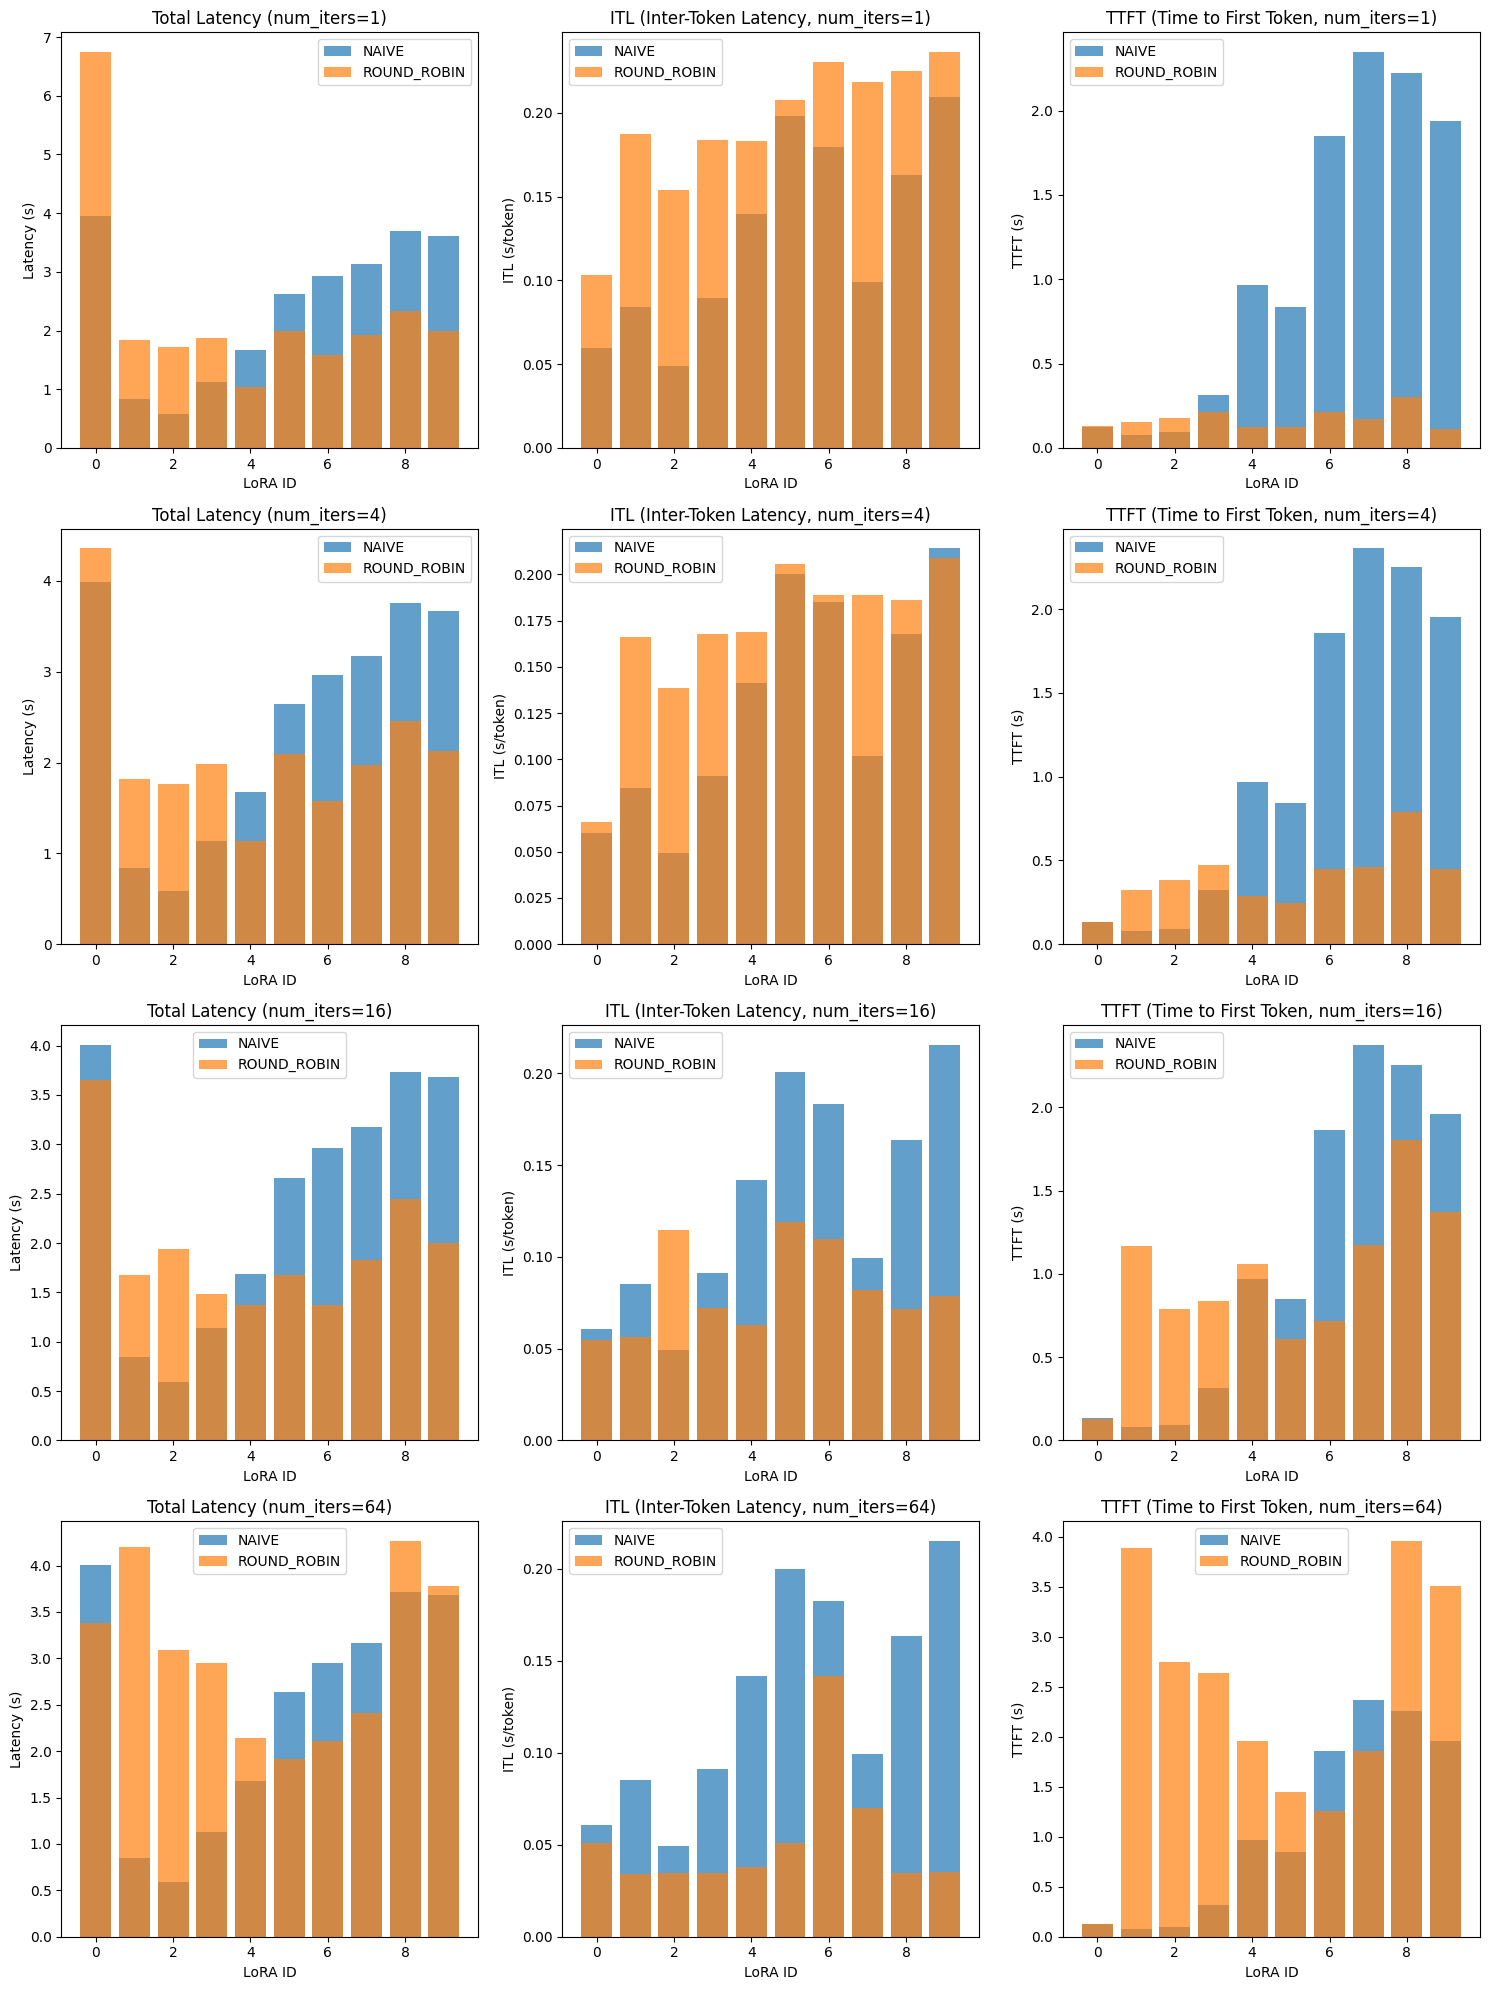

In [ ]:
metrics_df = pd.read_csv("../out/metrics_naive_fix.csv")
plot_metrics(metrics_df)

In [18]:
def plot_metrics(metrics_df):
    # Recompute metrics based on the clarified definitions
    metrics_df['itl'] = (metrics_df['last_token_time'] - metrics_df['first_scheduled_time']) / metrics_df['output_num_tokens']
    metrics_df['ttft'] = metrics_df['first_scheduled_time'] - metrics_df['arrival_time']
    metrics_df['total_latency'] = metrics_df['finished_time'] - metrics_df['arrival_time']

    # Group by LoRA policy, LoRA ID, num_iters_before_lora_reschedule, and max_loras
    revised_grouped = metrics_df.groupby(
        ['lora_policy', 'lora_id', 'num_iters_before_lora_reschedule', 'max_loras']
    ).agg({
        'total_latency': ['mean', 'std'],
        'itl': ['mean', 'std'],
        'ttft': ['mean', 'std']
    }).reset_index()

    # Simplify column names
    revised_grouped.columns = [
        'lora_policy', 'lora_id', 'num_iters_before_lora_reschedule', 'max_loras',
        'latency_mean', 'latency_std',
        'itl_mean', 'itl_std',
        'ttft_mean', 'ttft_std'
    ]

    # Unique combinations of num_iters_before_lora_reschedule and max_loras
    unique_iters = revised_grouped['num_iters_before_lora_reschedule'].unique()
    unique_max_loras = revised_grouped['max_loras'].unique()

    for max_loras in sorted(unique_max_loras):
        # Filter by max_loras
        max_loras_subset = revised_grouped[revised_grouped['max_loras'] == max_loras]

        fig, axs = plt.subplots(len(unique_iters), 3, figsize=(15, 5 * len(unique_iters)))
        fig.suptitle(f"Metrics for max_loras={max_loras}", fontsize=16)

        for idx, num_iters in enumerate(sorted(unique_iters)):
            # Filter by num_iters_before_lora_reschedule
            subset = max_loras_subset[max_loras_subset['num_iters_before_lora_reschedule'] == num_iters]
            naive_data = subset[subset['lora_policy'] == 'LoraPolicy.NAIVE']
            rr_data = subset[subset['lora_policy'] == 'LoraPolicy.ROUND_ROBIN']

            # Total Latency
            axs[idx, 0].bar(naive_data['lora_id'], naive_data['latency_mean'], label='NAIVE', alpha=0.7)
            axs[idx, 0].bar(rr_data['lora_id'], rr_data['latency_mean'], label='ROUND_ROBIN', alpha=0.7)
            axs[idx, 0].set_title(f"Total Latency (num_iters={num_iters})")
            axs[idx, 0].set_xlabel("LoRA ID")
            axs[idx, 0].set_ylabel("Latency (s)")
            axs[idx, 0].legend()

            # ITL (Inter-Token Latency)
            axs[idx, 1].bar(naive_data['lora_id'], naive_data['itl_mean'], label='NAIVE', alpha=0.7)
            axs[idx, 1].bar(rr_data['lora_id'], rr_data['itl_mean'], label='ROUND_ROBIN', alpha=0.7)
            axs[idx, 1].set_title(f"ITL (Inter-Token Latency, num_iters={num_iters})")
            axs[idx, 1].set_xlabel("LoRA ID")
            axs[idx, 1].set_ylabel("ITL (s/token)")
            axs[idx, 1].legend()

            # TTFT (Time to First Token)
            axs[idx, 2].bar(naive_data['lora_id'], naive_data['ttft_mean'], label='NAIVE', alpha=0.7)
            axs[idx, 2].bar(rr_data['lora_id'], rr_data['ttft_mean'], label='ROUND_ROBIN', alpha=0.7)
            axs[idx, 2].set_title(f"TTFT (Time to First Token, num_iters={num_iters})")
            axs[idx, 2].set_xlabel("LoRA ID")
            axs[idx, 2].set_ylabel("TTFT (s)")
            axs[idx, 2].legend()

        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()

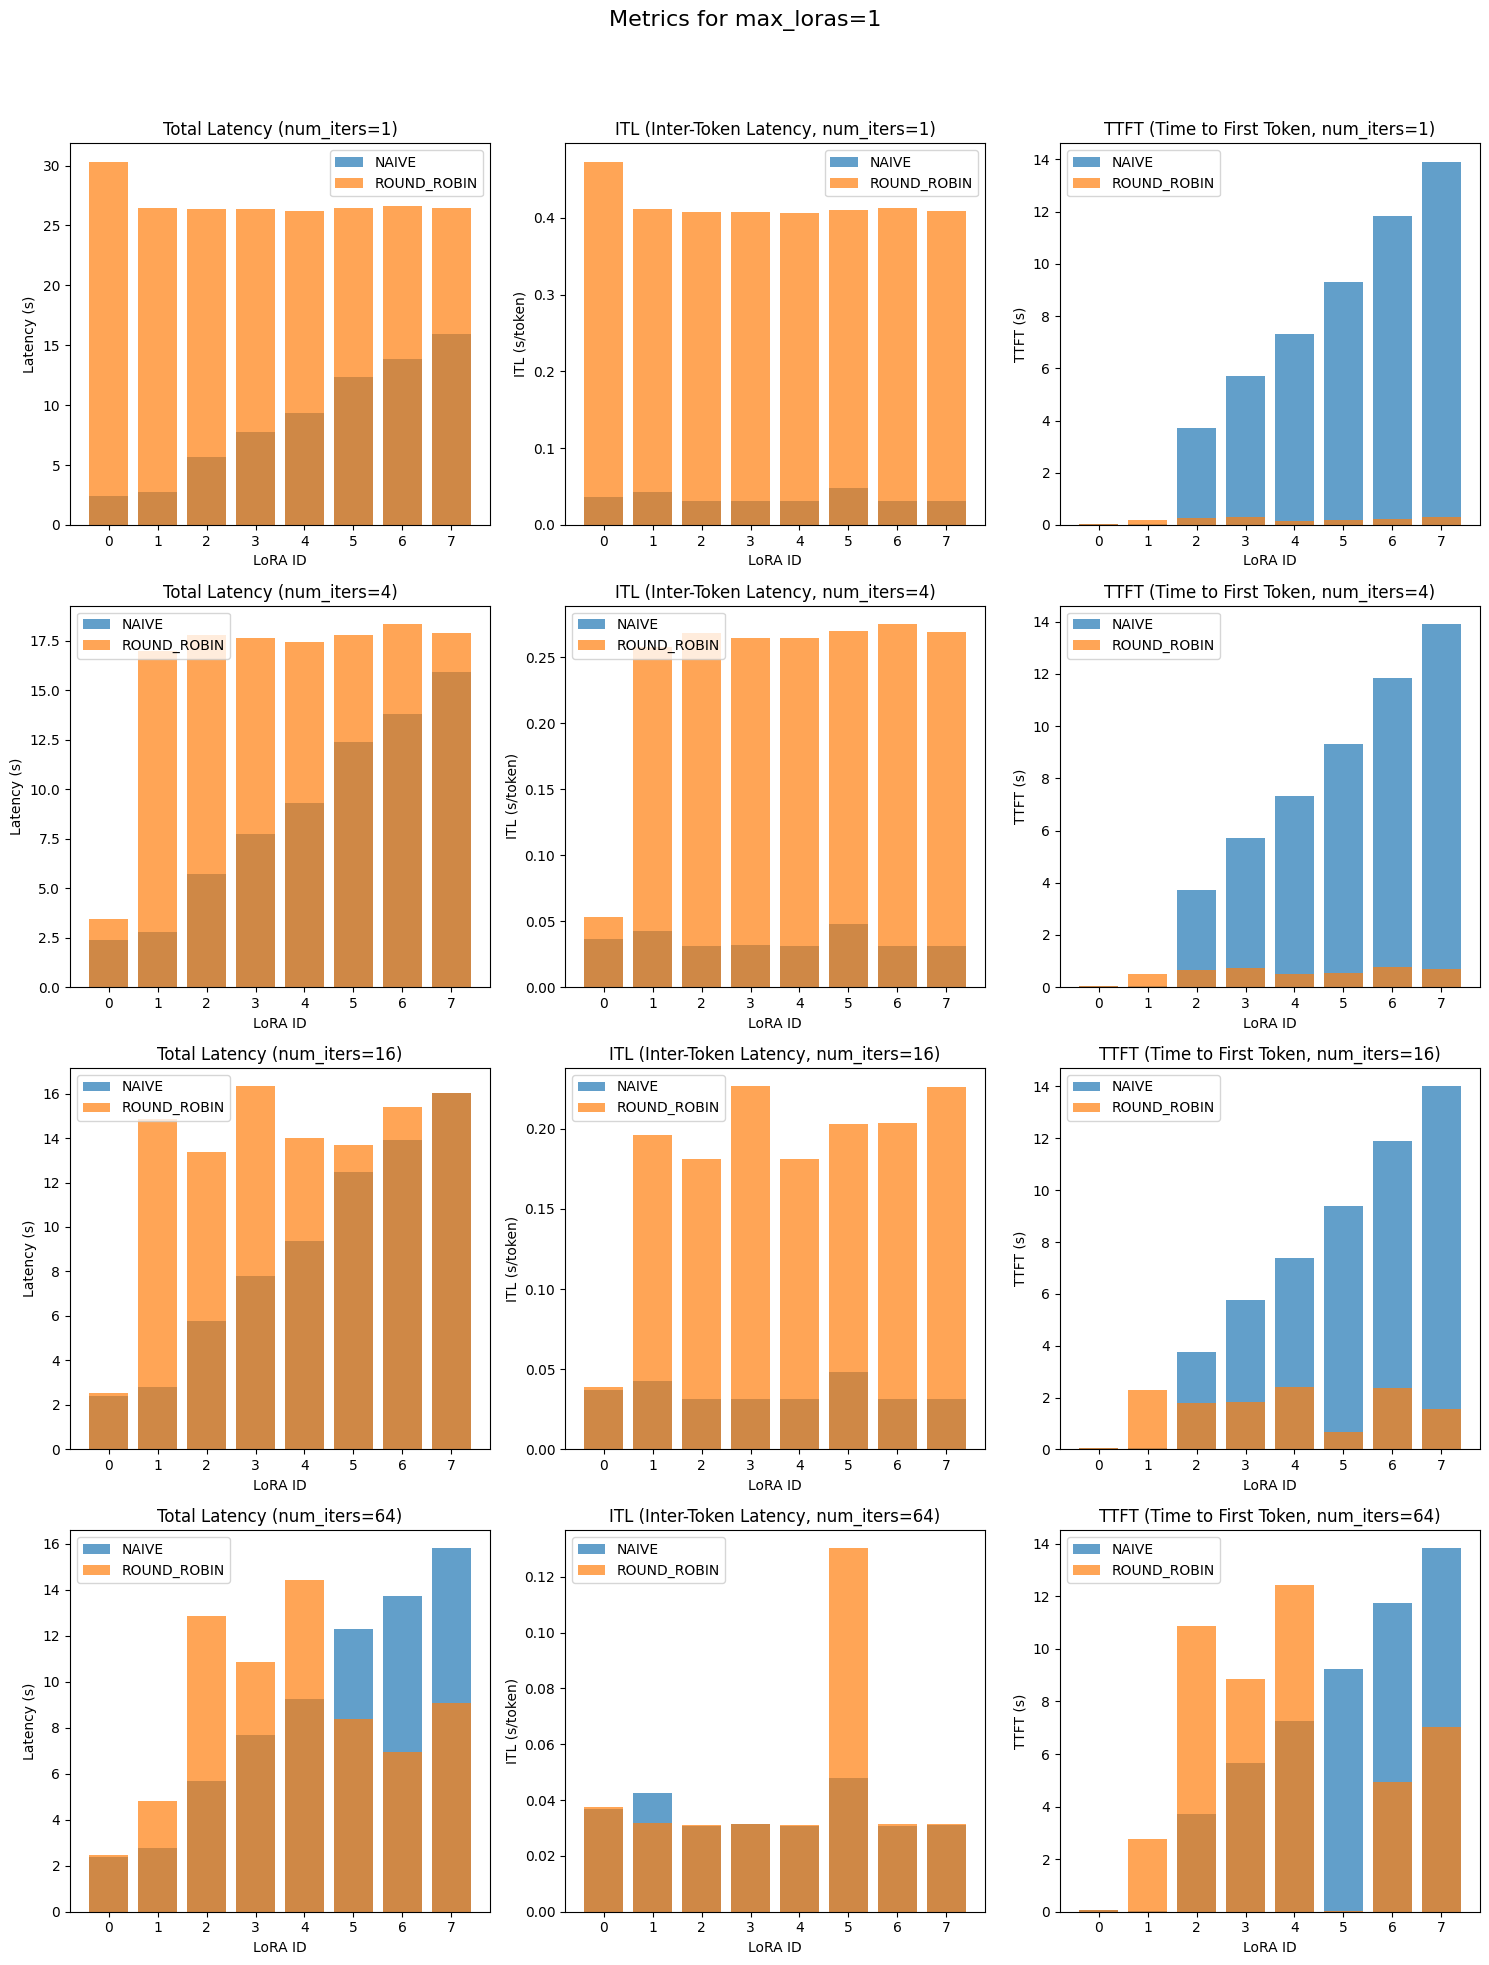

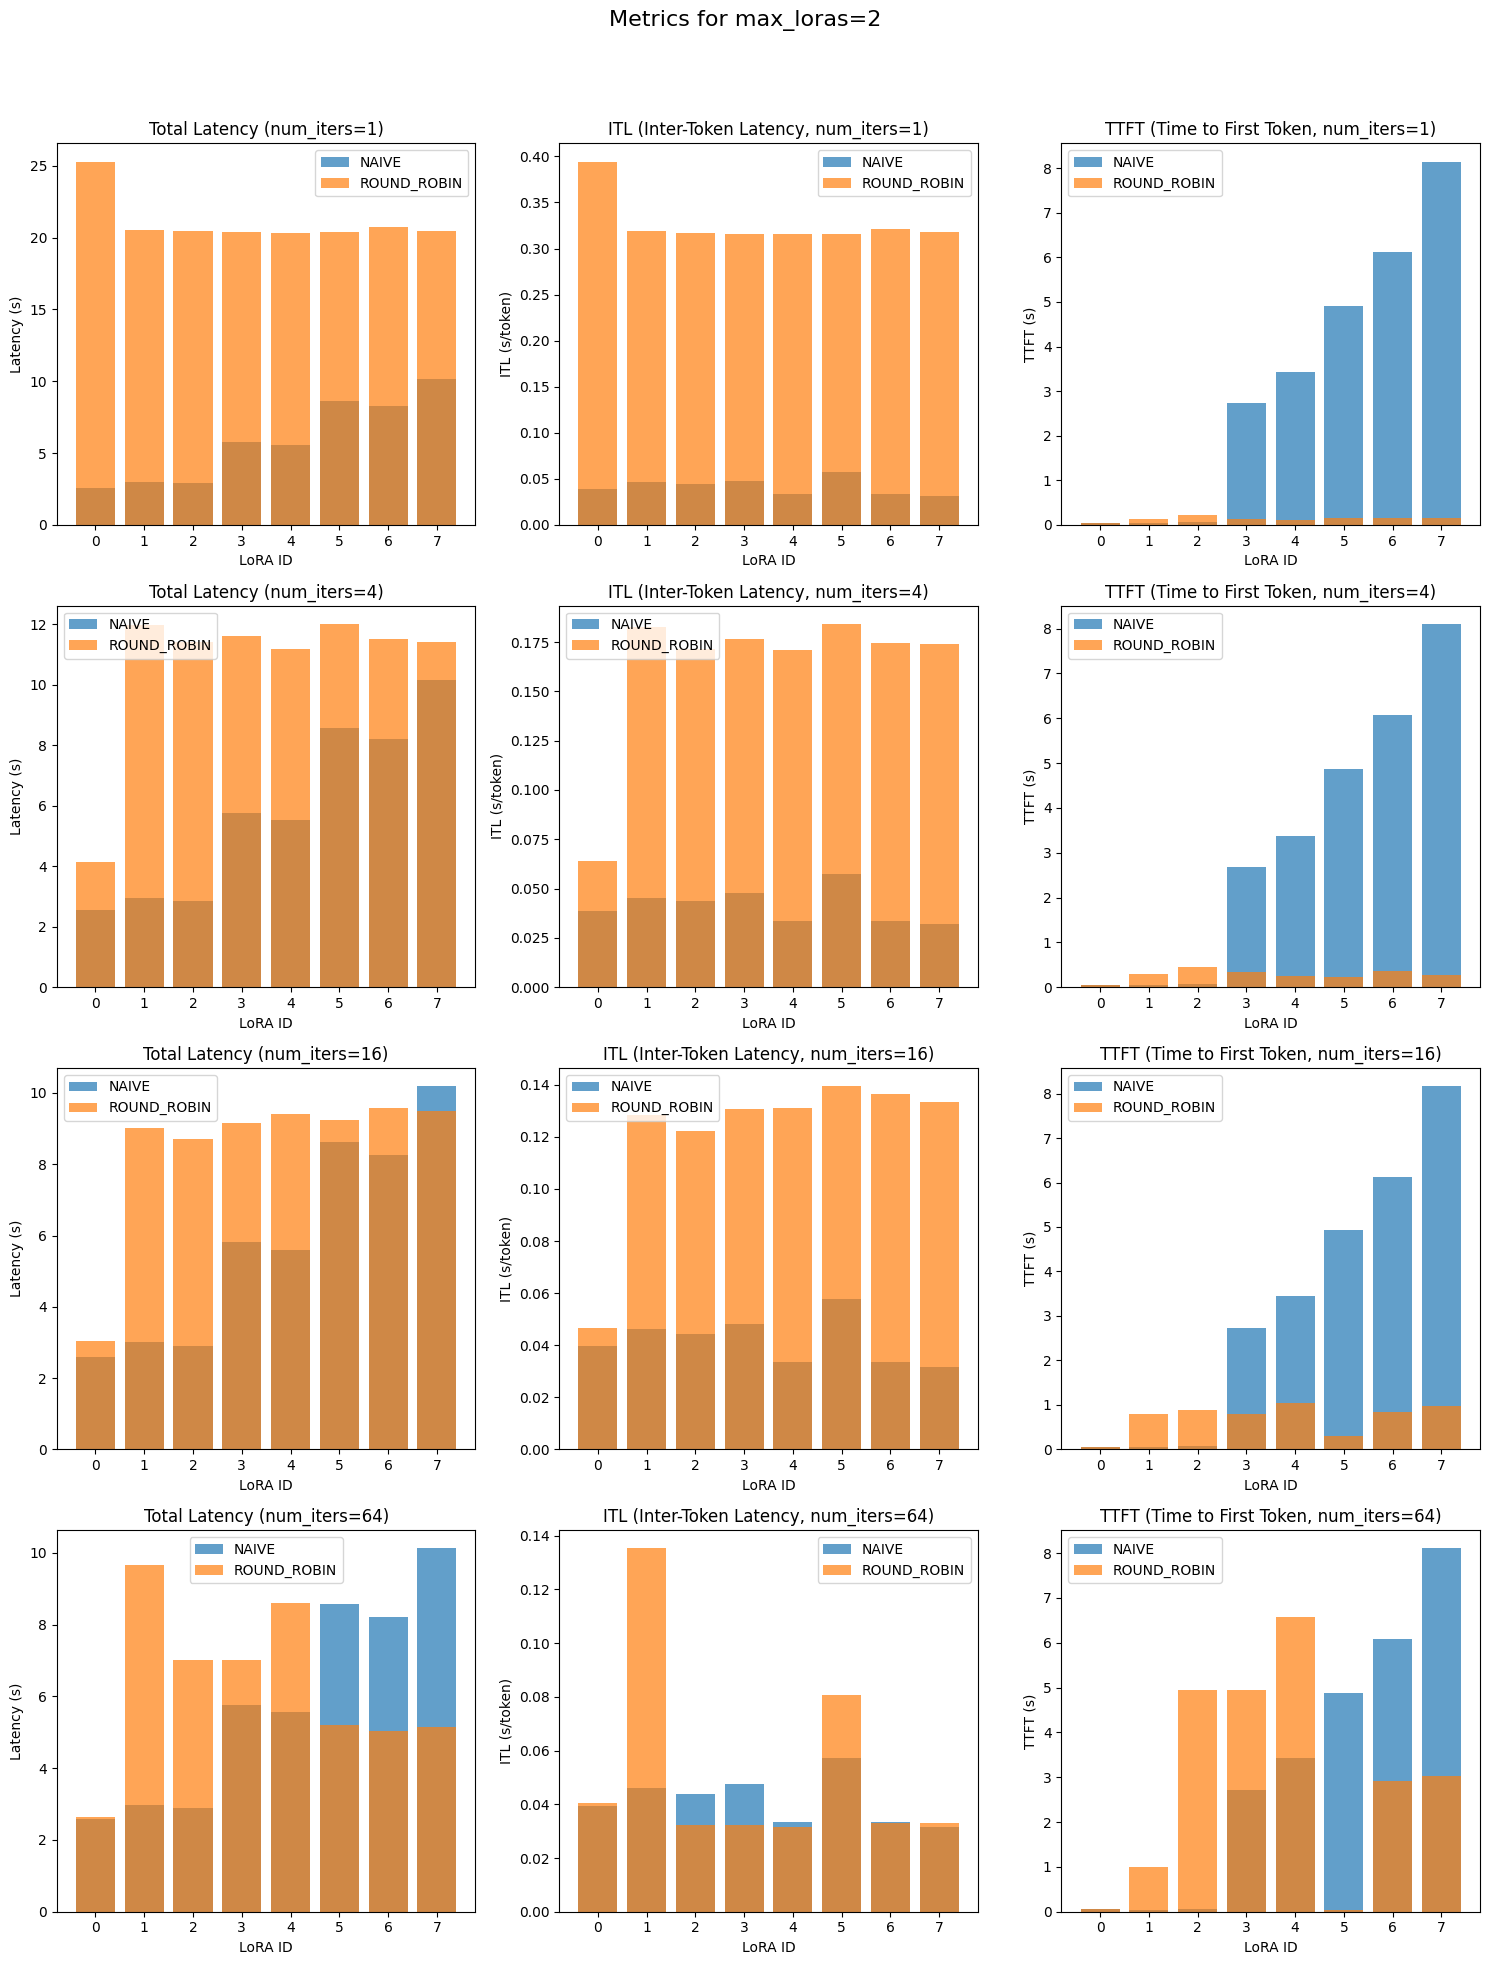

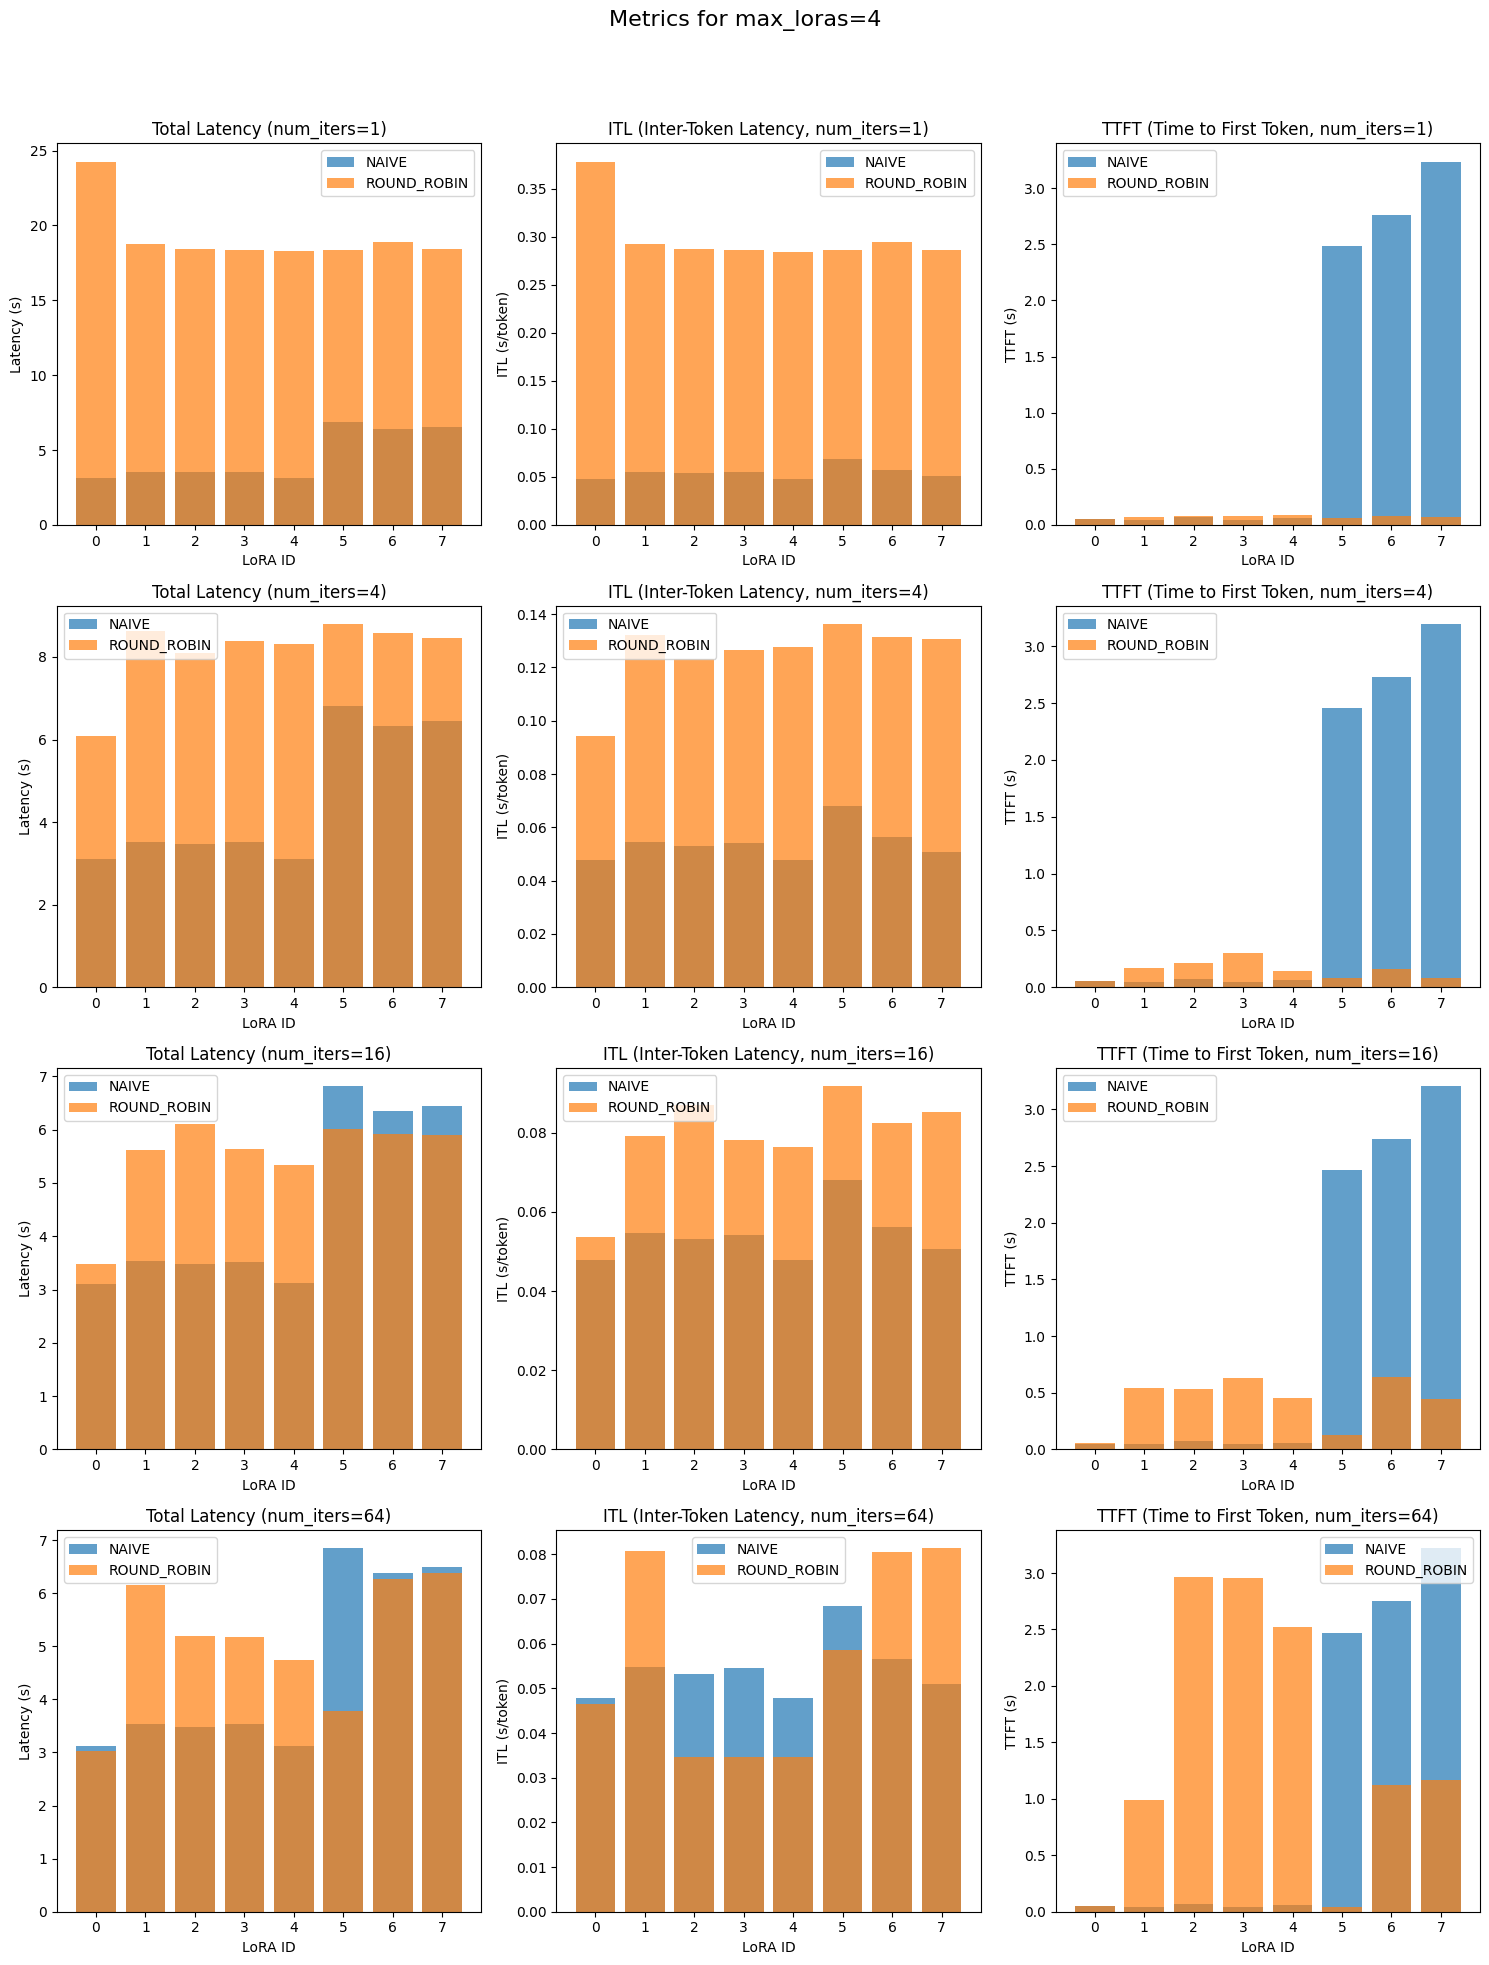

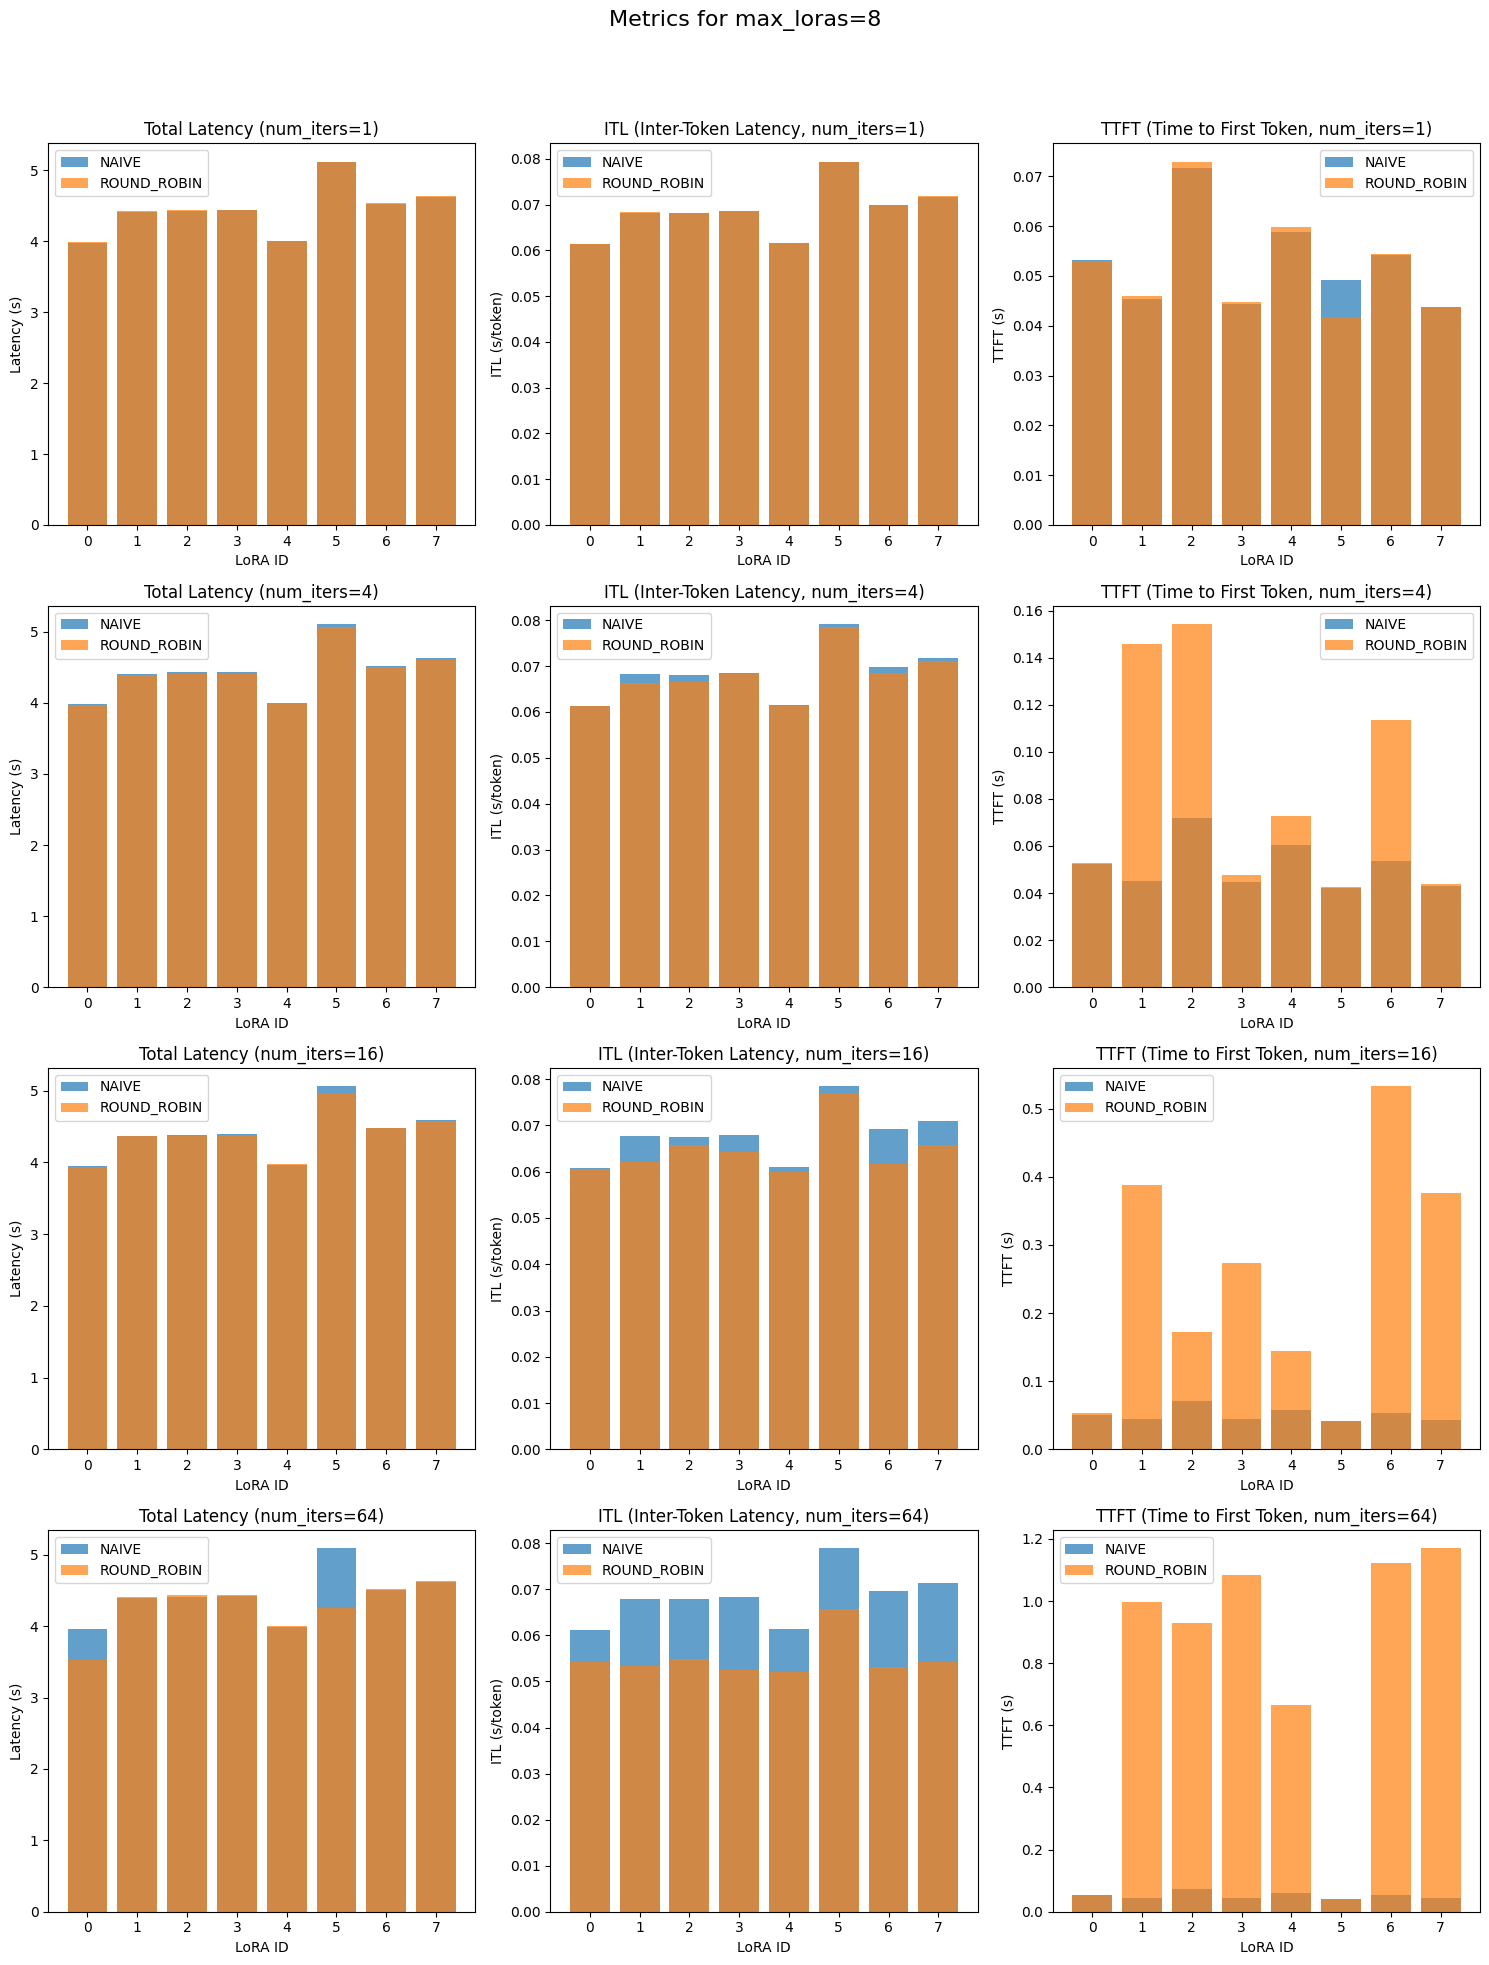

In [20]:
metrics_df = pd.read_csv("../out/metrics_max_loras.csv")
plot_metrics(metrics_df)